In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
gen_sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")
gen_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Data Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


<Axes: ylabel='Frequency'>

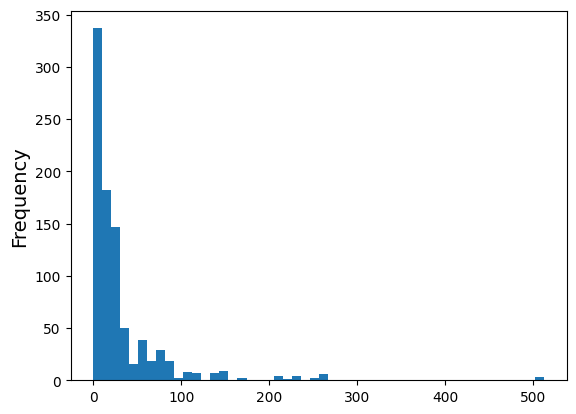

In [7]:
train.Fare.plot(kind="hist", bins=50)

<Axes: ylabel='Frequency'>

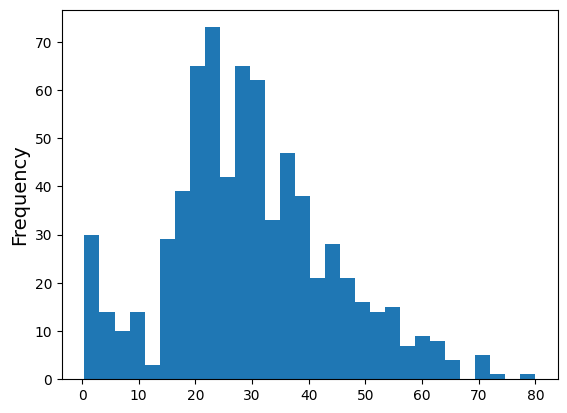

In [8]:
train.Age.plot(kind="hist", bins=30)
#train.Parch.plot(kind="hist", bins=30)
#train.SibSp.plot(kind="hist", bins=30)

<Axes: xlabel='Pclass'>

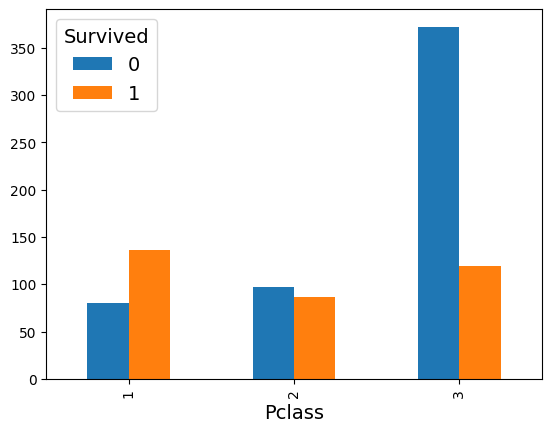

In [9]:
#train.plot(x="Survived", y="Pclass", kind="scatter")
#pd.crosstab(train.Pclass, train.Survived)
counts = train.groupby(["Pclass", "Survived"]).size().unstack()
counts.plot(kind="bar")

<Axes: xlabel='Embarked'>

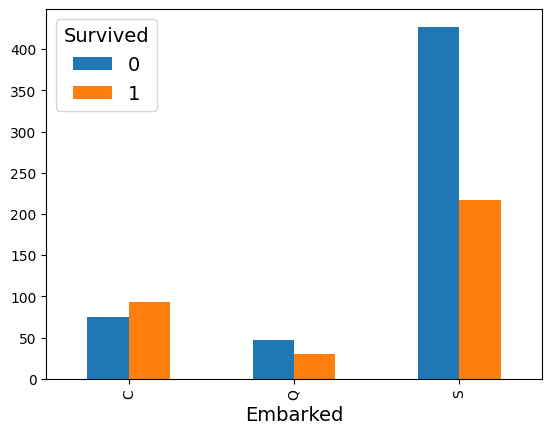

In [10]:
counts = train.groupby(["Embarked", "Survived"]).size().unstack()
counts.plot(kind="bar")

<Axes: xlabel='Parch'>

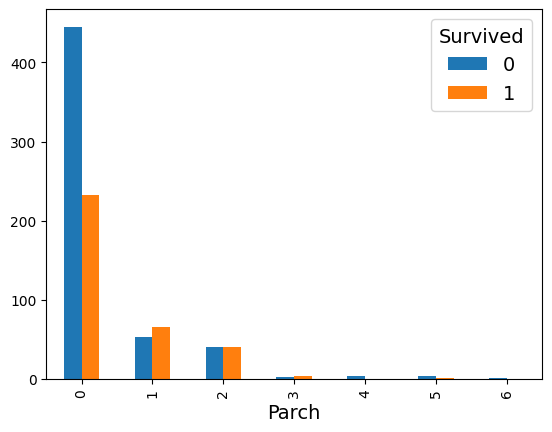

In [11]:
counts = train.groupby(["Parch", "Survived"]).size().unstack()
counts.plot(kind="bar")
# seems like it helps to have family members

# Handle Missing Values

In the long-run I can see myself using KNN or other more sophisticated methods for Age imputation. For this version we'll do with simple median imputation.


In [12]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

/tmp/ipykernel_36/3402040106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)


Cabin will be converted to binary "has cabin". Which will have to be numeric 0/1 to be used in KNN.

In [13]:
train['HasCabin'] = train['Cabin'].notna().astype(int)
train = train.drop('Cabin', axis=1)

test['HasCabin'] = test['Cabin'].notna().astype(int)
test = test.drop('Cabin', axis=1)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  HasCabin     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

Missing fare instances will be replaced with median, while missing embarked with mode.

In [14]:
embarked_mode = train['Embarked'].mode()[0]  # mode() returns a Series, so we take first value
train['Embarked'].fillna(embarked_mode, inplace=True)

test['Fare'].fillna(test['Fare'].median(), inplace=True)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  HasCabin     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

/tmp/ipykernel_36/3947298440.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(embarked_mode, inplace=True)
/tmp/ipykernel_36/3947298440.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

# Feature Selection
To limit the complexity of data (and save myself time for this version), I will drop SibSp, Parch, Ticket, Name and PassengerId (it's test values will be used later for submission).

In [15]:
train = train.drop(['SibSp', 'Parch', 'Ticket', 'Name', 'PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,HasCabin
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [16]:
test_ids=test['PassengerId']
test = test.drop(['SibSp', 'Parch', 'Ticket', 'Name', 'PassengerId'], axis=1)
test.tail()
print(test_ids)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64


# Encoding Categorical Variables
For Sex numerical 0/1. For embarked one-hot encoding.

In [17]:
train['Sex'] = train["Sex"].map({'male':0,'female':1})
train.head()

test['Sex'] = test["Sex"].map({'male':0,'female':1})
test.head()

,Pclass,Sex,Age,Fare,Embarked,HasCabin
0,3,0,34.5,7.8292,Q,0
1,3,1,47.0,7.0000,S,0
2,2,0,62.0,9.6875,Q,0
3,3,0,27.0,8.6625,S,0
4,3,1,22.0,12.2875,S,0


In [18]:
# Creates 3 columns: Embarked_C, Embarked_Q, Embarked_S
embarked_encoded = pd.get_dummies(train['Embarked'], prefix='Embarked')
train = pd.concat([train.drop('Embarked', axis=1), embarked_encoded], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0,False,False,True
1,1,1,1,38.0,71.2833,1,True,False,False
2,1,3,1,26.0,7.9250,0,False,False,True
3,1,1,1,35.0,53.1000,1,False,False,True
4,0,3,0,35.0,8.0500,0,False,False,True


In [19]:
# Creates 3 columns: Embarked_C, Embarked_Q, Embarked_S
embarked_encoded = pd.get_dummies(test['Embarked'], prefix='Embarked')
test = pd.concat([test.drop('Embarked', axis=1), embarked_encoded], axis=1)
test.head()

,Pclass,Sex,Age,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,7.8292,0,False,True,False
1,3,1,47.0,7.0000,0,False,False,True
2,2,0,62.0,9.6875,0,False,True,False
3,3,0,27.0,8.6625,0,False,False,True
4,3,1,22.0,12.2875,0,False,False,True


# Outlier Handling

Percentage clipping for Fare feature (recommended by Claude, not my level yet to differentiate which techniques are better depending on the case).

In [20]:
print(train['Fare'].describe())
print(f"95th percentile: ${train['Fare'].quantile(0.95):.2f}")
print(f"99th percentile: ${train['Fare'].quantile(0.99):.2f}")

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
95th percentile: $112.08
99th percentile: $249.01


<Axes: ylabel='Frequency'>

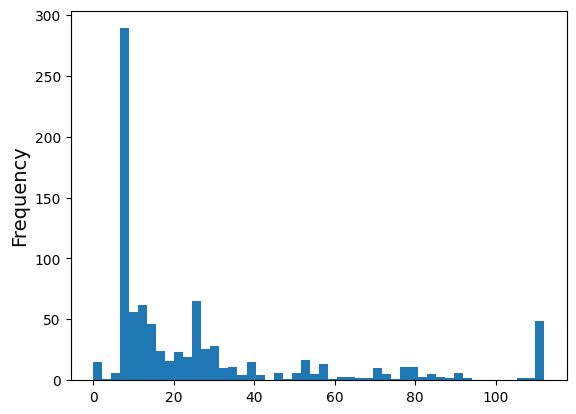

In [21]:
fare_cap = train['Fare'].quantile(0.95)
train['Fare'] = train['Fare'].clip(upper=fare_cap)
train.Fare.plot(kind="hist", bins=50)

# Feature Scaling
This is mostly by Claude's recommendation. It applies standard scaler to all, not at the level yet to judge how big of a mistake this could be. 


In [22]:
train.head()

,Survived,Pclass,Sex,Age,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0,False,False,True
1,1,1,1,38.0,71.2833,1,True,False,False
2,1,3,1,26.0,7.9250,0,False,False,True
3,1,1,1,35.0,53.1000,1,False,False,True
4,0,3,0,35.0,8.0500,0,False,False,True


In [23]:
test.head()

,Pclass,Sex,Age,Fare,HasCabin,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,7.8292,0,False,True,False
1,3,1,47.0,7.0000,0,False,False,True
2,2,0,62.0,9.6875,0,False,True,False
3,3,0,27.0,8.6625,0,False,False,True
4,3,1,22.0,12.2875,0,False,False,True


In [24]:
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = train.drop('Survived', axis=1)  # Remove target variable!
y = train['Survived']

# 2. Convert booleans to integers
bool_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
for col in bool_columns:
    X[col] = X[col].astype(int)

# 3. Scale ALL features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Create scaled dataframe (for visibility)
X_scaled_df = pd.DataFrame(
    X_scaled, 
    columns=X.columns,
    index=X.index
)

print(X_scaled_df.head())

     Pclass       Sex       Age      Fare  HasCabin  Embarked_C  Embarked_Q  \
0  0.827377 -0.737695 -0.565736 -0.700836 -0.544925   -0.482043   -0.307562   
1 -1.566107  1.355574  0.663861  1.491434  1.835115    2.074505   -0.307562   
2  0.827377  1.355574 -0.258337 -0.677726 -0.544925   -0.482043   -0.307562   
3 -1.566107  1.355574  0.433312  0.868903  1.835115   -0.482043   -0.307562   
4  0.827377 -0.737695  0.433312 -0.673447 -0.544925   -0.482043   -0.307562   

   Embarked_S  
0    0.615838  
1   -1.623803  
2    0.615838  
3    0.615838  
4    0.615838  


In [25]:
# 1. Convert booleans to integers
bool_columns_test = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
for col in bool_columns_test:
    test[col] = test[col].astype(int)

# 2. Scale ALL features
test_scaled = scaler.transform(test)

# 3. Create scaled dataframe (for visibility)
test_scaled_df = pd.DataFrame(
    test_scaled, 
    columns=test.columns,
    index=test.index
)

print(test_scaled_df.head())

     Pclass       Sex       Age      Fare  HasCabin  Embarked_C  Embarked_Q  \
0  0.827377 -0.737695  0.394887 -0.681006 -0.544925   -0.482043    3.251373   
1  0.827377  1.355574  1.355510 -0.709395 -0.544925   -0.482043   -0.307562   
2 -0.369365 -0.737695  2.508257 -0.617385 -0.544925   -0.482043    3.251373   
3  0.827377 -0.737695 -0.181487 -0.652477 -0.544925   -0.482043   -0.307562   
4  0.827377  1.355574 -0.565736 -0.528370 -0.544925   -0.482043   -0.307562   

   Embarked_S  
0   -1.623803  
1    0.615838  
2   -1.623803  
3    0.615838  
4    0.615838  


# Training the KNN!

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Train baseline KNN on full training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled_df, y)

# Predict on scaled test data
test_preds = knn.predict(test_scaled_df)

# Build Kaggle submission file
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_preds
})

In [27]:
# Save to CSV
submission.to_csv("submission.csv", index=False)

print("Submission file created: submission.csv")

Submission file created: submission.csv


# Performance and Error Analysis
This includes: Precision, Recall, F1, Confusion Matrix, ROC Curve, AUC and Detailed Confusion Matrix (error analysis).

In [28]:
from sklearn.model_selection import cross_val_predict

# I use cross_val_predict function to then create a confusion matrix.
# I'll use my defined KNN on the train set.
y_train_pred = cross_val_predict(knn, X_scaled_df, y, cv=3)

In [29]:
# Creating the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_train_pred)
cm

array([[462,  87],
       [105, 237]])

In [30]:
# Precision and Recall Score

from sklearn.metrics import precision_score, recall_score
ps = precision_score(y, y_train_pred)
rs = recall_score(y, y_train_pred)

print("Precision Score:", ps)
print("Recall Score:", rs)

Precision Score: 0.7314814814814815
Recall Score: 0.6929824561403509


In [31]:
# F1 Score (Harmonic mean of precision and recall that gives more weight to lower values)

from sklearn.metrics import f1_score
f1 = f1_score(y, y_train_pred)

print("F1:", f1)

F1: 0.7117117117117118


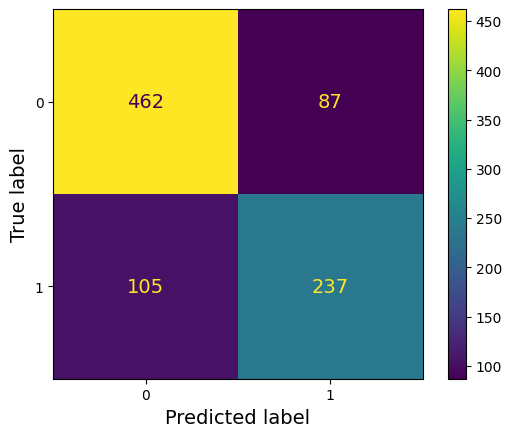

In [32]:
#Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y, y_train_pred)
plt.show()

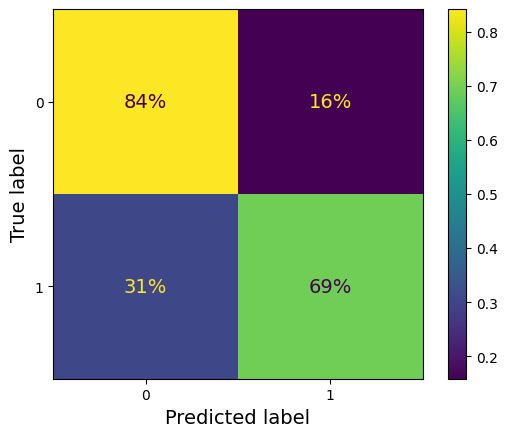

In [33]:
ConfusionMatrixDisplay.from_predictions(y, y_train_pred, normalize="true", values_format=".0%")
plt.show()

In [34]:
# From this we can see that our knn model does more false negatives (31%), then false positives (16%)
# This means we could shift the threshold and this would improve the model?

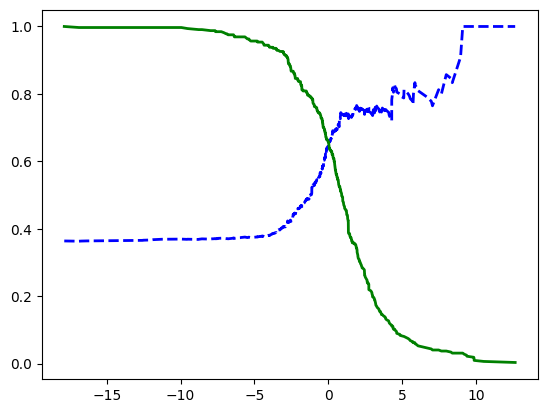

In [36]:
# Precision Recall Tradeoff

# KNN doesn't have decision boundary method, so we use sgd_clf instead

from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)

y_scores= cross_val_predict(sgd_clf, X_scaled_df, y, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_pred, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2) 
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2) 

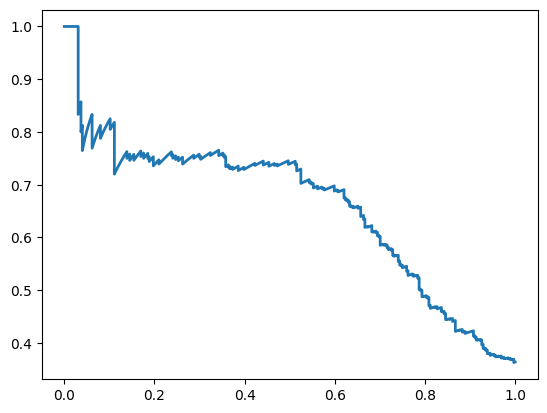

In [37]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall Curve")
plt.show()

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_scores)

NameError: name 'fpr_90' is not defined

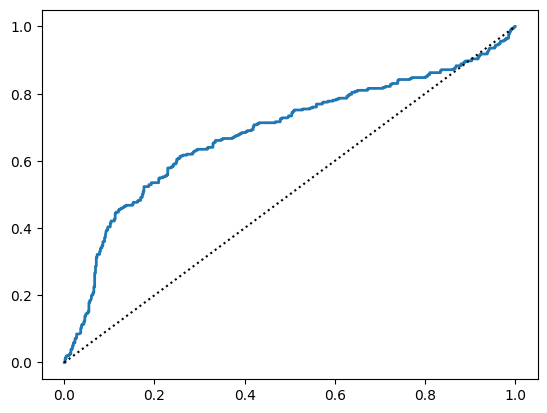

In [40]:
plt.plot(fpr, tpr, linewidth=2, label="ROC curve") 
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve") 
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision") 

plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, y_scores)

0.6831293473513779